In [1]:
__author__ = "Luke Rhinehart"
__version__ = "Fall 2023"
__pylint__ = "Version 3.11.4"

#Github repo is at https://github.com/0000LRhinehart/Project-2-Data-Analytics

In [2]:
'''Part 1
   Dataset Overview'''

# The dataset is sourced from https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset/

# What trends exist on whether an employee will leave or not and what factors can affect the likelyhood of leaving?

# The data contains 9 columns and 4653 rows
# It features information about the statuses of employees in a company.
# Its collumns contain data on the employee's education status, when they joined the company, city where they are employed, tier of payment,
# age, gender, if they have been without assigned work, how much experince they have in the field, and if they left or not.

# The target variable is LeaveOrNot which represents whether they have left or not with a 0 for if they have left or a 1 if they have stayed.

# The goal is to determine what factors lead to an employee leaving the company.

'Part 1\n   Dataset Overview'

In [3]:
'''Part 2
   load data and import'''
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Employee.csv',)

display(df)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [4]:
'''Part 2 
   Check for Null Values'''

print(df.isnull().sum()) # no missing or null values

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


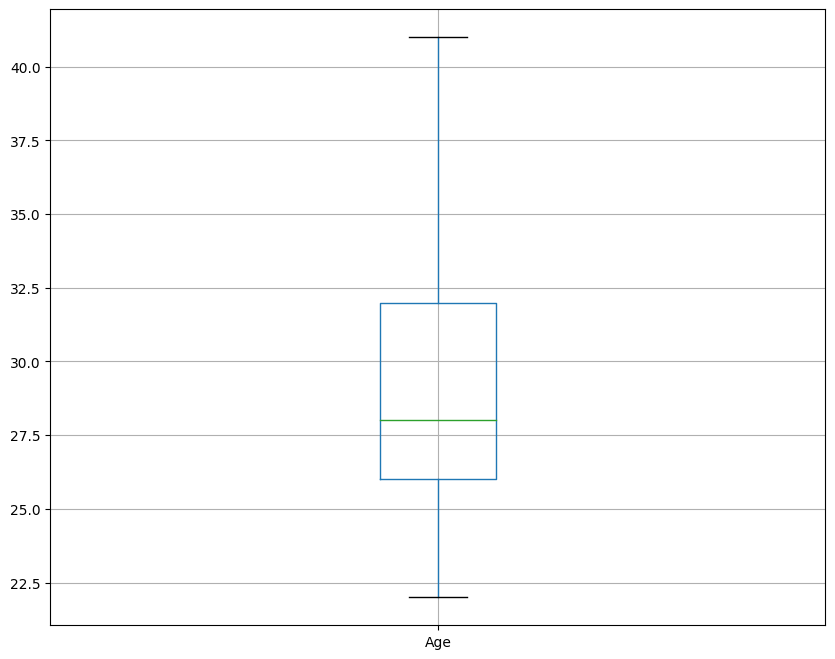

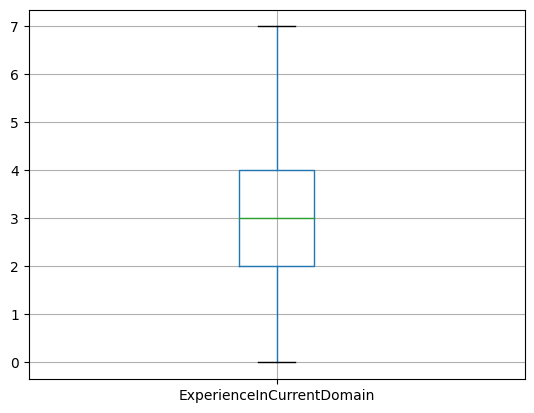

In [5]:
'''Part 2
   data cleaning: Boxplots 
   Checking for outliers'''

num_list=['Age', 'ExperienceInCurrentDomain']
fig=plt.figure(figsize=(10, 8))


df.boxplot(column=['Age'])
plt.show()
df.boxplot(column=['ExperienceInCurrentDomain'])
plt.show()


#There does not appear to be any outliers in the numeric values Age and ExperienceInCurrentDomain

In [6]:
'''Part 3
   Feature Engineering'''

# Converting categorical values into numerics
df_replace = df.replace({'Bachelors': 0, 'Masters': 1, 'PHD': 2})
df_replace['JoiningYear'] = df_replace['JoiningYear'].replace({2012: 0, 2013: 1, 2014: 2, 2015: 3, 2016: 4, 2017: 5, 2018: 6})
df_replace = df_replace.replace({'Bangalore': 0, 'Pune': 1, 'New Delhi': 2})
df_replace['PaymentTier'] = df_replace['PaymentTier'].replace({1: 0, 2: 1, 3: 2})
df_replace = df_replace.replace({'No': 0, 'Yes': 1})
df_replace = df_replace.replace({'Male': 0, 'Female': 1})


display(df_replace) #Verify that values were replaced properly


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,5,0,2,34,0,0,0,0
1,0,1,1,0,28,1,0,3,1
2,0,2,2,2,38,1,0,2,0
3,1,4,0,2,27,0,0,5,1
4,1,5,1,2,24,0,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,1,0,2,26,1,0,4,0
4649,1,1,1,1,37,0,0,2,1
4650,1,6,2,2,27,0,0,5,1
4651,0,0,0,2,30,0,1,2,0


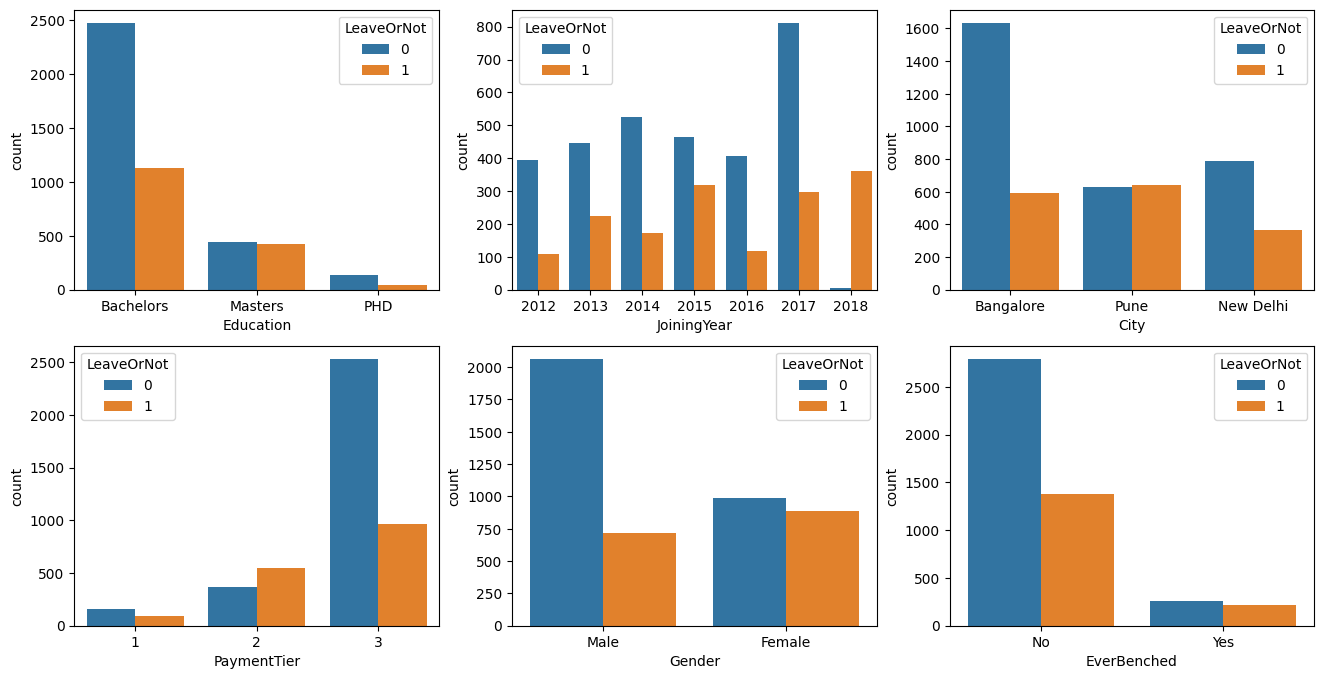

In [7]:
'''Part 3
   Categorical Features vs. Target -
   Grouped Bar Chart or Stacked Bar Chart'''

cat_list=['Education','JoiningYear', 'City', 'PaymentTier', 'Gender', 'EverBenched']

fig=plt.figure(figsize=(16,8))

for i in range(len(cat_list)):
    column=cat_list[i]
    sub=fig.add_subplot(2,3,i+1)
    chart=sns.countplot(x=column,hue='LeaveOrNot', data=df)

# notable occurances here is that masters degree havers are near one to one leaving and staying while Bachelors and phd havers are similar appearing
# The year appears to have little trends though the latest year 2018 had the most remaining memebers and least departures
# payment tier seems to indicate higher tier payments have far greater members and retain more
# There are more overall male employees however more female departures


In [8]:
'''Part 3
   ANOVA'''
from sklearn.feature_selection import SelectKBest, f_classif, chi2

x = df.loc[:, ['Age', 'ExperienceInCurrentDomain']]
y = df.loc[:, 'LeaveOrNot']

fs = SelectKBest(score_func=f_classif, k='all') # call the method
bestFeatures = fs.fit(x, y) # train the model
np.set_printoptions(suppress = True)
print(bestFeatures.scores_) # print out the scores
print(bestFeatures.pvalues_)

#The p values are not above 5% and thus these values can be used.

[12.18890725  4.33179346]
[0.00048521 0.03746138]


In [9]:
'''Part 3
   Chi Squared'''

x = df_replace.loc[:, ['Education','JoiningYear', 'City', 'PaymentTier', 'Gender', 'EverBenched']]
y = df_replace.loc[:, 'LeaveOrNot']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)

print(catFeatures.scores_)
print(catFeatures.pvalues_)

#All f scores are moderately high and no p value is above 5%

[ 30.94216784 174.11428281  24.00280989  33.72681236 135.31280877
  25.6865888 ]
[0.00000003 0.         0.00000096 0.00000001 0.         0.0000004 ]


In [10]:
'''Part 3
   Correlation Coefficients and final observations'''

print(df.corr())

# No coefficients are significantly high correlations to each other. None need to be removed.
# From the f scores found before we will get the two highest JoiningYear and Gender

# Due to the comparitive lowness Age and ExperienceInCurrentDomain will be dropped
df_drop = df_replace.drop(columns=['Age','ExperienceInCurrentDomain'])


                           JoiningYear  PaymentTier       Age  \
JoiningYear                   1.000000    -0.096078  0.013165   
PaymentTier                  -0.096078     1.000000  0.007631   
Age                           0.013165     0.007631  1.000000   
ExperienceInCurrentDomain    -0.036525     0.018314 -0.134643   
LeaveOrNot                    0.181705    -0.197638 -0.051126   

                           ExperienceInCurrentDomain  LeaveOrNot  
JoiningYear                                -0.036525    0.181705  
PaymentTier                                 0.018314   -0.197638  
Age                                        -0.134643   -0.051126  
ExperienceInCurrentDomain                   1.000000   -0.030504  
LeaveOrNot                                 -0.030504    1.000000  


C:\Users\Rhino\AppData\Local\Temp\ipykernel_18104\1903082721.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [11]:
'''Part 3
   Feature Scaling'''
x_final = df_replace.loc[:, ['JoiningYear','Gender']]

from sklearn.preprocessing import MinMaxScaler

nor_x= MinMaxScaler()    
x_scaled= nor_x.fit_transform(x_final)


In [12]:
'''Part 4
   prediction model'''

#Data balancing

# The number of departures from the company outnumber retained employees and balancing is needed.


display(df_drop)

,Education,JoiningYear,City,PaymentTier,Gender,EverBenched,LeaveOrNot
0,0,5,0,2,0,0,0
1,0,1,1,0,1,0,1
2,0,2,2,2,1,0,0
3,1,4,0,2,0,0,1
4,1,5,1,2,0,1,1
...,...,...,...,...,...,...,...
4648,0,1,0,2,1,0,0
4649,1,1,1,1,0,0,1
4650,1,6,2,2,0,0,1
4651,0,0,0,2,0,1,0


In [13]:
'''Part 4
   Generate Accuracy Score'''
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=60, stratify=y)

from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)
accuracy_score(y_test, y_predicted)

0.5821697099892589

In [14]:
'''Part 4
   k values'''

k_values = [] # create a list to store the k-values

for i in range(1, 15):
    if i%6 !=0:
        k_values.append(i)
    
print(k_values)

[1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14]


In [15]:
'''Part 4
   optimal k scores using cross validation'''
from sklearn.model_selection import cross_val_score

k_accuracy_scores = [] # use this list to save the accuracy scores.

for k in k_values: # use a loop to iterate the k values.
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores=cross_val_score(knn, x_scaled, y, cv=10, scoring='accuracy')
    k_accuracy_scores.append(cv_scores.mean())



# use a DataFrame to save k-values vs. each accuracy score.
df_k_scores = pd.DataFrame(data = np.c_[k_values, k_accuracy_scores], columns = ['k', 'accuracy'])

print(df_k_scores)

# The optimal K score is 8


       k  accuracy
0    1.0  0.653565
1    2.0  0.720824
2    3.0  0.696102
3    4.0  0.733927
4    5.0  0.705774
5    7.0  0.692891
6    8.0  0.728797
7    9.0  0.704494
8   10.0  0.728572
9   11.0  0.706867
10  13.0  0.713099
11  14.0  0.719323


In [16]:

'''for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(1,2,i+1)
    sns.boxplot(x='LeaveOrNot',y=column, data=df)

plt.show()'''

"for i in range(len(num_list)):\n    column=num_list[i]\n    sub=fig.add_subplot(1,2,i+1)\n    sns.boxplot(x='LeaveOrNot',y=column, data=df)\n\nplt.show()"